# Imports

In [1]:
import sys
sys.path.append("../../sem")
import sem
import pprint
import matplotlib.pyplot as plt
import seaborn as sns
import numpy
sns.set_style("white")

# Define SEM Campaign

In [2]:
# Open SEM campaign with the required path & directory.
campaign_dir = "../lte-results-a3-vel"
campaign = sem.CampaignManager.load(campaign_dir, check_repo=False)

# Run the Simulation

In [3]:
# Load the saved simulations with the parameter set.
params = {'hysteresis': 3, 'timeToTrigger': [256.0], 'a3Offset': [x * 0.5 for x in range(-30, 30)], 'speed': [10.0, 20.0, 30.0, 40.0, 50.0, 60.0, 70.0, 80.0, 90.0, 100.0], 'simTime': [3], 'useUdp': [1], 'RngRun': [1]}
#campaign.run_missing_simulations(params, stop_on_errors=False)

# Parse the Results

In [4]:
# Function to get average throughput, number of HOs and RLFs
def get_average_throughput(result):    
    if result['output']['stderr'] != "":
        throughput = -1
        num_HOs = -1
        num_RLFs = -1
    else:
        split_results = result['output']['stdout'].split("\n")
        throughput = float(split_results[-1].split(" ")[1])
        num_HOs = 0
        num_RLFs = 0
        for line in split_results:
            event = line.split(":")[0]
            if event == "UE_HO_START":
                num_HOs += 1
            elif event == "UE_RLF_DETECTED":
                num_RLFs += 1	
    return [num_HOs, num_RLFs, throughput]

In [5]:
# Use the parsing function to create a Pandas dataframe
results = campaign.get_results_as_dataframe(get_average_throughput, ['Num_HOs', 'Num_RLFs', 'Throughput'], params=params, drop_constant_columns=True)
print(results)

     a3Offset  speed  Num_HOs  Num_RLFs  Throughput
0       -15.0   10.0       85         0  12273000.0
1       -15.0   20.0       91         0  12554600.0
2       -15.0   30.0       94         0  12531700.0
3       -15.0   40.0       97         0  12829000.0
4       -15.0   50.0       98         0  12586000.0
..        ...    ...      ...       ...         ...
595      14.5   60.0        2         3  11023700.0
596      14.5   70.0        6         3  10505900.0
597      14.5   80.0       10         4  10243400.0
598      14.5   90.0       12         4  10038300.0
599      14.5  100.0       16         5  10064600.0

[600 rows x 5 columns]


Text(0.5, 0.92, 'Throughput Plot for A3-Vel')

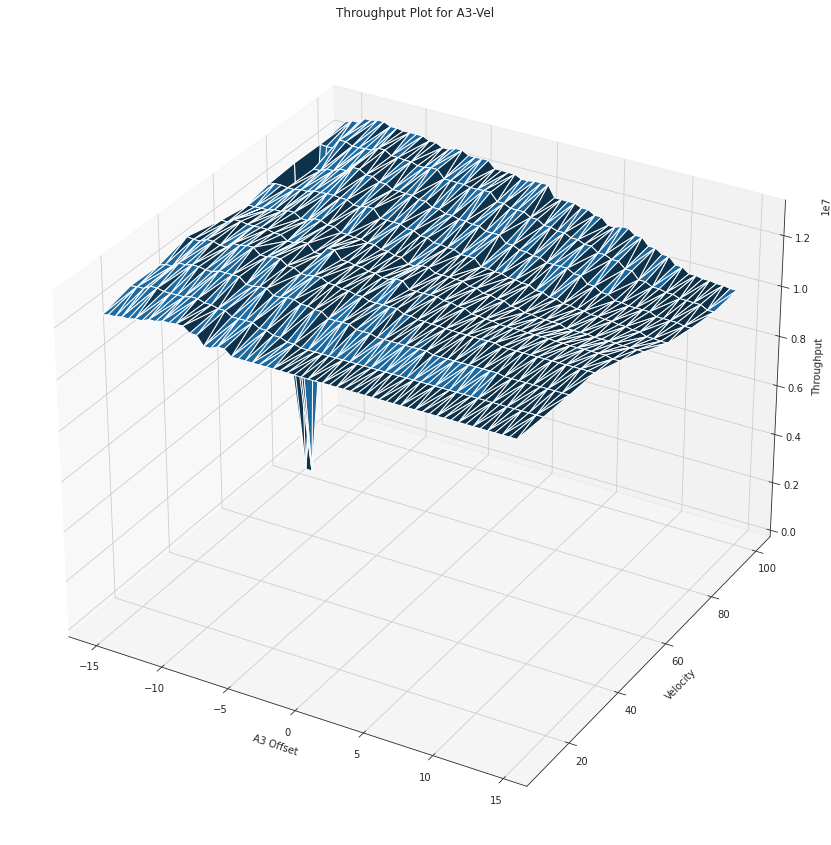

In [6]:
fig = plt.figure(figsize=(25, 15))
ax = plt.axes(projection='3d')
ax.plot_trisurf(results['a3Offset'], results['speed'], results['Throughput'])
ax.set_xlabel('A3 Offset')
ax.set_ylabel('Velocity')
ax.set_zlabel('Throughput')
ax.set_title('Throughput Plot for A3-Vel')

Text(0.5, 0.92, 'Num_HOs Plot for A3-Vel')

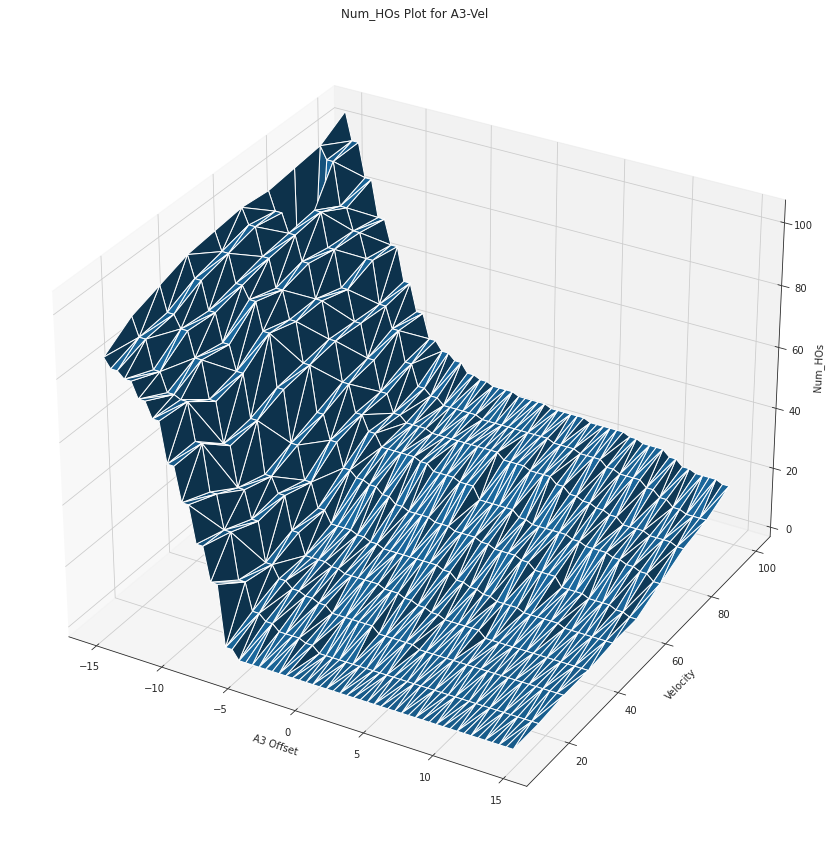

In [7]:
fig = plt.figure(figsize=(25, 15))
ax = plt.axes(projection='3d')
ax.plot_trisurf(results['a3Offset'], results['speed'], results['Num_HOs'])
ax.set_xlabel('A3 Offset')
ax.set_ylabel('Velocity')
ax.set_zlabel('Num_HOs')
ax.set_title('Num_HOs Plot for A3-Vel')

Text(0.5, 0.92, 'Num_RLFs Plot for A3-Vel')

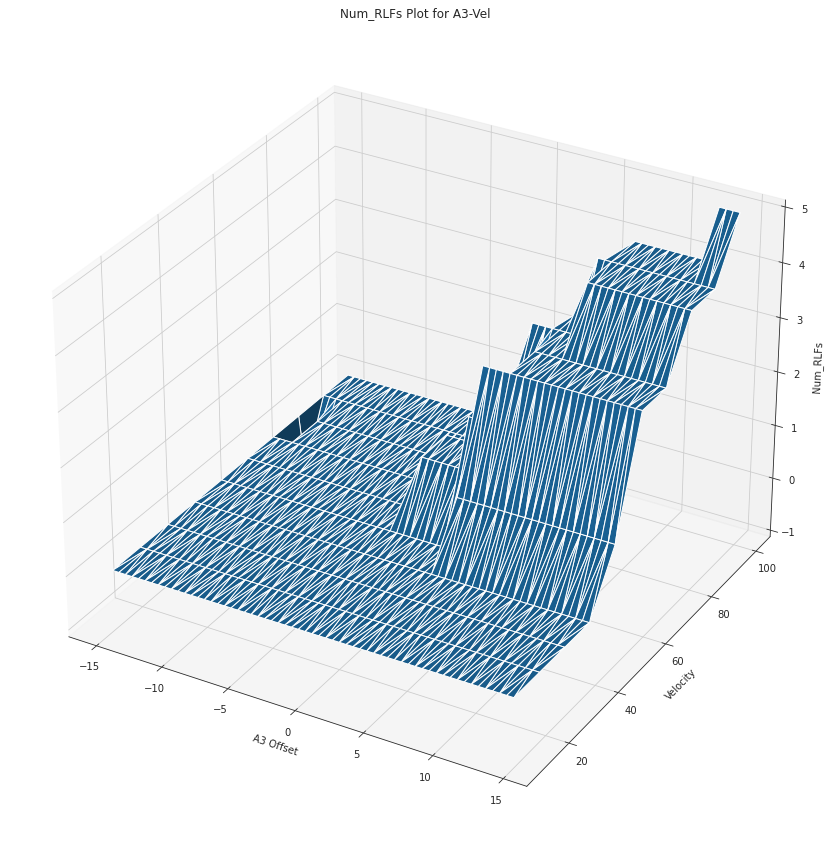

In [8]:
fig = plt.figure(figsize=(25, 15))
ax = plt.axes(projection='3d')
ax.plot_trisurf(results['a3Offset'], results['speed'], results['Num_RLFs'])
ax.set_xlabel('A3 Offset')
ax.set_ylabel('Velocity')
ax.set_zlabel('Num_RLFs')
ax.set_title('Num_RLFs Plot for A3-Vel')

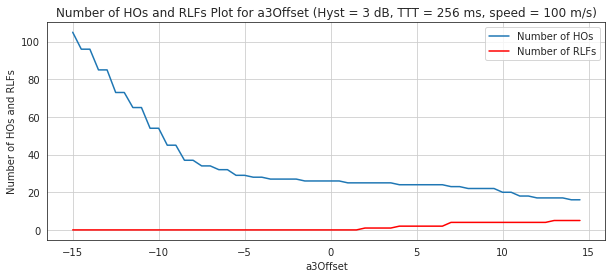

In [9]:
results2 = results[(results['speed'] == 100)]
fig = plt.figure(figsize=(10, 4))
ax = plt.axes()
ax.plot(results2['a3Offset'], results2['Num_HOs'])
ax.plot(results2['a3Offset'], results2['Num_RLFs'], color = 'red')
ax.grid()
ax.set_xlabel('a3Offset')
ax.set_ylabel('Number of HOs and RLFs')
ax.set_title('Number of HOs and RLFs Plot for a3Offset (Hyst = 3 dB, TTT = 256 ms, speed = 100 m/s)')
ax.legend(['Number of HOs', 'Number of RLFs'])

In [11]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
regr.fit(results['a3Offset'].to_numpy().reshape(-1, 1), results['Num_HOs'].to_numpy().reshape(-1, 1))
print(regr.intercept_)
print(regr.coef_)
print(regr.score(results['a3Offset'].to_numpy().reshape(-1, 1), results['Num_HOs'].to_numpy().reshape(-1, 1)))

[23.68462443]
[[-2.38816894]]
0.5947526342395496


In [12]:
regr = LinearRegression()
regr.fit(results['a3Offset'].to_numpy().reshape(-1, 1), results['Num_RLFs'].to_numpy().reshape(-1, 1))
print(regr.intercept_)
print(regr.coef_)
print(regr.score(results['a3Offset'].to_numpy().reshape(-1, 1), results['Num_RLFs'].to_numpy().reshape(-1, 1)))

[0.7691368]
[[0.08988052]]
0.32756563854276655
